# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import pandas as pd

df = pd.read_csv('data/human_body_temperature.csv')

In [3]:
df.head(10)

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0
5,99.2,M,83.0
6,98.0,M,71.0
7,98.8,M,78.0
8,98.4,F,84.0
9,98.6,F,86.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB


In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

In [6]:
import numpy as np

In [7]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""

    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n + 1) / n

    return x, y

In [8]:
# computer cdf for body temperature

x, y = ecdf(df.temperature)

# Question 1: are the temperatures normally distributed?

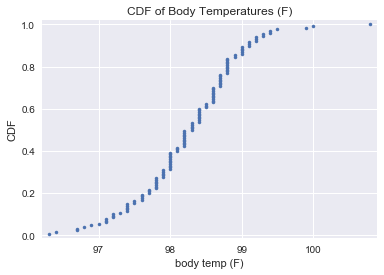

In [9]:
# plot observed cdf

_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.xlabel('body temp (F)')
_ = plt.ylabel('CDF')
_ = plt.title('CDF of Body Temperatures (F)')

plt.margins(0.02)
plt.show()

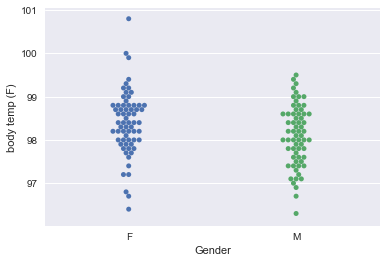

In [10]:
# swarm plot separating male and female

sns.swarmplot(x='gender', y='temperature', data=df)
_ = plt.xlabel('Gender')
_ = plt.ylabel('body temp (F)')

plt.show()

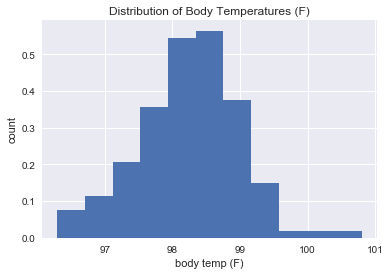

In [19]:
# histogram of all body temps

_ = plt.hist(df.temperature, bins=11, normed=True)
_ = plt.xlabel('body temp (F)')
_ = plt.ylabel('count')
_ = plt.title('Distribution of Body Temperatures (F)')

plt.show()

In [24]:
# draw 10000 samples to visualize theoretical normal CDF around oberserved mean

experimental_temperature = np.random.normal(np.mean(df.temperature), np.std(df.temperature), size=10000)

x_exp, y_exp = ecdf(experimental_temperature)

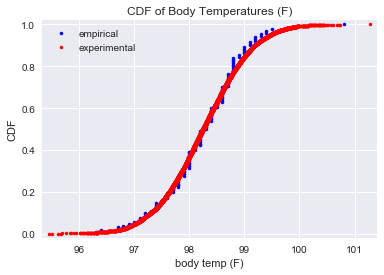

In [29]:
# plot observed CDF and experimental CDF together

# plot observed cdf

_ = plt.plot(x, y, marker='.', linestyle='none', color='blue', label='empirical')
_ = plt.plot(x_exp, y_exp, marker='.', linestyle='none', color='red', label='experimental')
_ = plt.xlabel('body temp (F)')
_ = plt.ylabel('CDF')
_ = plt.title('CDF of Body Temperatures (F)')
_ = plt.legend()

plt.margins(0.02)
plt.show()

#### Conclusion re: Distribution

Based upon the above-plotted histogram and the comparison between empirical CDF and simulated normal CDF, the empirical temperature data appears to be approximately normally distributed.  However, the simulated normal distribution shows more temperature values on the high side (i.e., greater than the mean) than the empirical CDF.  Therefore, the empirical temperatures are not exactly normally distributed.

# Question 2: is the sample size large and observations independent?